# Baseline: Linear Regression under ideal assumptions

**Theory reference**
- theory/assumptions.md
- theory/closed_form_vs_gd.md

**Role of this notebook**
This notebook establishes a clean reference behavior for linear regression
when core OLS assumptions approximately hold.

It is intentionally simple and is used only as a comparison point for later
assumption violations.

**What this notebook does NOT show**
- Failure modes
- Regularization effects
- Performance optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)

X = np.linspace(0, 10, 200).reshape(-1, 1)
noise = np.random.normal(loc=0.0, scale=1.0, size=len(X))
y = 3.0 * X.squeeze() + 5.0 + noise

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [5]:
y_pred = model.predict(X_test)

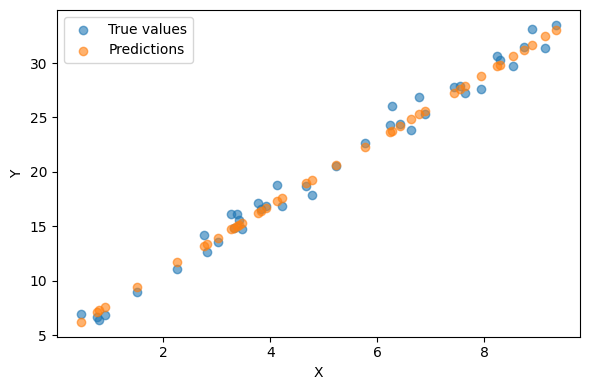

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, label="True values", alpha=0.6)
plt.scatter(X_test, y_pred, label="Predictions", alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.tight_layout()
plt.show()

This notebook serves as a reference baseline for later assumption-violation experiments.